In [79]:
import pandas as pd
album = pd.read_csv("songs_sentiment.tsv", sep="\t", encoding="utf-8")
album


,song_name,album,year,positive,negative,compound
0,Pistol Whip,Speak To Me,2008,0.106,0.109,-0.7604
1,Living Musical,Speak To Me,2008,0.245,0.036,0.9992
2,The Pit,Speak To Me,2008,0.122,0.051,0.9764
3,Speak To Me,Speak To Me,2008,0.134,0.060,0.9610
4,Boots,Speak To Me,2008,0.055,0.066,-0.2580


## positive negative plots

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

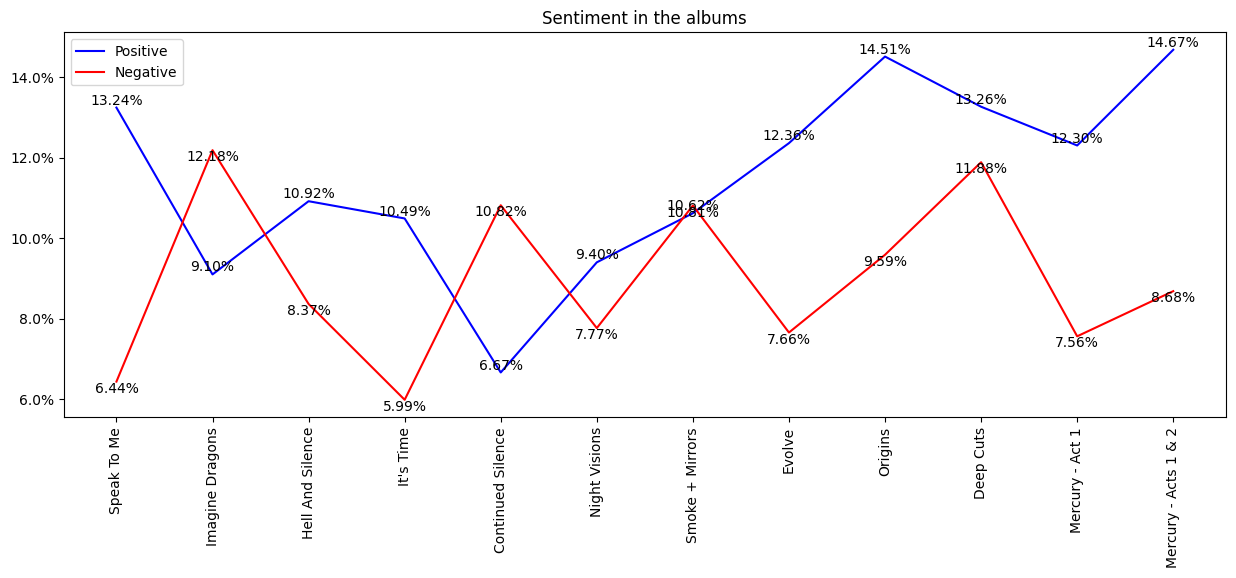

In [25]:
# Line plot of positive and negative sentiment
plt.figure(figsize=(15, 5))
plt.plot(album["positive"]*100, label="Positive", color="blue")
plt.plot(album["negative"]*100, label="Negative", color="red")
# poner album en el eje x
plt.xticks(range(len(album)), album["album"], rotation=90)
# Aplicamos el formato de porcentaje al eje y
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())
# Etiquetar cada punto con su porcentaje sin tapar la linea ni otros numeros
for i in range(len(album)):
    plt.text(i, album["positive"][i]*100, f"{album['positive'][i]*100:.2f}%", ha="center", va="bottom")
    plt.text(i, album["negative"][i]*100, f"{album['negative'][i]*100:.2f}%", ha="center", va="top")



plt.title("Sentiment in the albums")

plt.legend()
plt.show()

In [53]:
#!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.9 kB 3.2 MB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.9 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00


In [54]:
import seaborn as sns

In [58]:
# plot line graph
import pandas as pd
import matplotlib.pyplot as plt
album = pd.read_csv("songs_sentiment.tsv", sep="\t", encoding="utf-8")

import seaborn as sns
ax = sns.lineplot(x='year', y='positive', data=album, marker='*', color='#965786')
ax.set(title='Total Number of Passengers Yearly')
# label points on the plot
for x, y in zip(album['year'], album['positive']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
 y = y-150, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
 color = 'purple') # set colour of line

plt.show()

ValueError: Image size of 858x655978 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x500 with 1 Axes>

## Compund plot

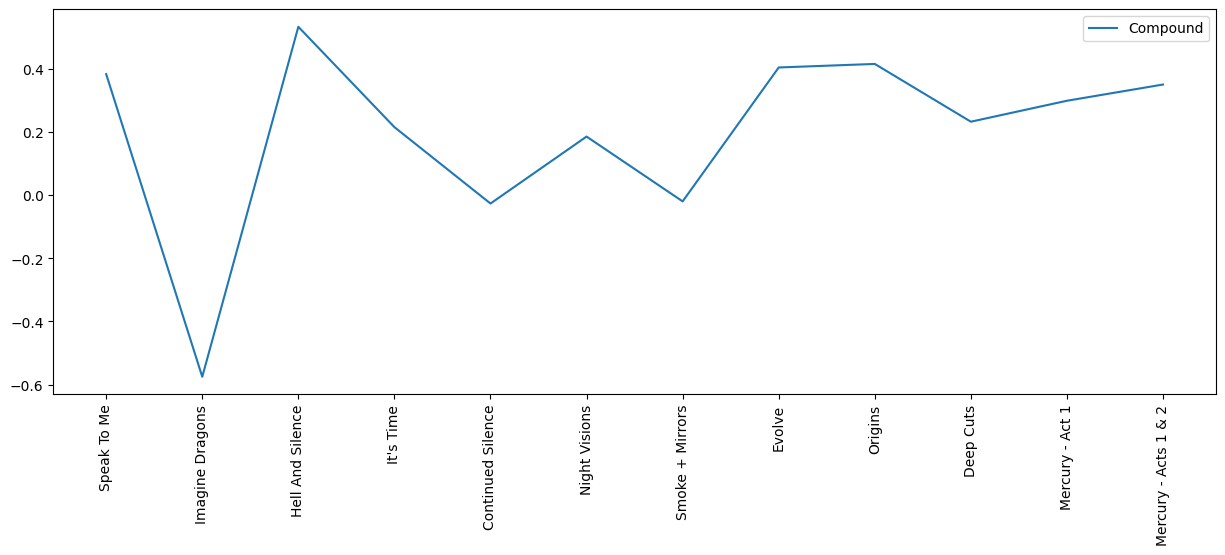

In [24]:
# Line plot of positive and negative sentiment
plt.figure(figsize=(15, 5))
plt.plot(album["compound"], label="Compound")
# poner album en el eje x
plt.xticks(range(len(album)), album["album"], rotation=90)
plt.legend()
plt.show()

## Top 5 Analysis

In [81]:
songs = pd.read_csv("songs_sentiment_by_song.tsv", sep="\t", encoding="utf-8")
songs.head()

,song_name,album,year,positive,negative,compound
0,Pistol Whip,Speak To Me,2008,0.106,0.109,-0.7604
1,Living Musical,Speak To Me,2008,0.245,0.036,0.9992
2,The Pit,Speak To Me,2008,0.122,0.051,0.9764
3,Speak To Me,Speak To Me,2008,0.134,0.060,0.9610
4,Boots,Speak To Me,2008,0.055,0.066,-0.2580


In [98]:
# Tabla tabulate
def print_table(df):
    from tabulate import tabulate
    from IPython.display import Markdown, display

    html_table = df
    html_table = html_table.replace('<table border="1" class="dataframe">',
                                    '<table style="border-collapse: collapse; border: 1px solid black;">')
    html_table = html_table.replace('<td>', '<td style="text-align: center; padding: 8px;">')
    html_table = html_table.replace('<tr style="text-align: right;">', '<tr>')
    html_table = html_table.replace('<th>', '<th style="text-align: center; background-color: #f2f2f2; padding: 8px;">')
    markdown_table = tabulate(df, tablefmt="pipe", headers="keys", showindex=False)

    # Imprimir la tabla Markdown con colores
    display(Markdown(markdown_table))
    # Imprimir el texto raw
    print(markdown_table)
    #imprimir html raw
    print(html_table)

#### Positive

In [93]:
# Remover titulos duplicados manteniendo el del año mas antiguo
songs = songs.drop_duplicates("song_name", keep="first")
positive = songs.sort_values("positive", ascending=False)
positive = positive[['song_name','album','year','positive']]
positive.head(5) # top 5 songs with highest positive sentiment

,song_name,album,year,positive
92,Love,Origins,2018,0.400
104,Lovesong,Deep Cuts,2020,0.346
145,Take It Easy,Mercury - Acts 1 & 2,2022,0.330
121,No Time For Toxic People,Mercury - Act 1,2021,0.323
148,Ferris Wheel,Mercury - Acts 1 & 2,2022,0.317


In [99]:
print_table(positive.head(5))

| song_name                | album                |   year |   positive |
|:-------------------------|:---------------------|-------:|-----------:|
| Love                     | Origins              |   2018 |      0.4   |
| Lovesong                 | Deep Cuts            |   2020 |      0.346 |
| Take It Easy             | Mercury - Acts 1 & 2 |   2022 |      0.33  |
| No Time For Toxic People | Mercury - Act 1      |   2021 |      0.323 |
| Ferris Wheel             | Mercury - Acts 1 & 2 |   2022 |      0.317 |

| song_name                | album                |   year |   positive |
|:-------------------------|:---------------------|-------:|-----------:|
| Love                     | Origins              |   2018 |      0.4   |
| Lovesong                 | Deep Cuts            |   2020 |      0.346 |
| Take It Easy             | Mercury - Acts 1 & 2 |   2022 |      0.33  |
| No Time For Toxic People | Mercury - Act 1      |   2021 |      0.323 |
| Ferris Wheel             | Mercury - Acts 1 & 2 |   2022 |      0.317 |
                    song_name                 album  year  positive
92                       Love               Origins  2018     0.400
104                  Lovesong             Deep Cuts  2020     0.346
145              Take It Easy  Mercury - Acts 1 & 2  2022     0.330
121  No Time For Toxic People       Mercury - Act 1  2021     0.323
148              Ferris Wheel  Mercury - Acts 1 & 2  2022     0.317


#### Negative

In [100]:
# Negative sentiment
negative = songs.sort_values("negative", ascending=False)
negative = negative[['song_name','album','year','negative']]
negative.head() # top 5 songs with highest negative sentiment

,song_name,album,year,negative
88,Bullet In A Gun,Origins,2018,0.439
57,Trouble,Smoke + Mirrors,2015,0.374
85,Bad Liar,Origins,2018,0.350
15,Emma,Hell And Silence,2010,0.338
118,Dull Knives,Mercury - Act 1,2021,0.333


In [101]:
print_table(negative.head(5))

| song_name       | album            |   year |   negative |
|:----------------|:-----------------|-------:|-----------:|
| Bullet In A Gun | Origins          |   2018 |      0.439 |
| Trouble         | Smoke + Mirrors  |   2015 |      0.374 |
| Bad Liar        | Origins          |   2018 |      0.35  |
| Emma            | Hell And Silence |   2010 |      0.338 |
| Dull Knives     | Mercury - Act 1  |   2021 |      0.333 |

| song_name       | album            |   year |   negative |
|:----------------|:-----------------|-------:|-----------:|
| Bullet In A Gun | Origins          |   2018 |      0.439 |
| Trouble         | Smoke + Mirrors  |   2015 |      0.374 |
| Bad Liar        | Origins          |   2018 |      0.35  |
| Emma            | Hell And Silence |   2010 |      0.338 |
| Dull Knives     | Mercury - Act 1  |   2021 |      0.333 |
           song_name             album  year  negative
88   Bullet In A Gun           Origins  2018     0.439
57           Trouble   Smoke + Mirrors  2015     0.374
85          Bad Liar           Origins  2018     0.350
15              Emma  Hell And Silence  2010     0.338
118      Dull Knives   Mercury - Act 1  2021     0.333
